In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
import collections
import witwidget
import os, glob


from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot


from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [3]:
# Set column dtypes for Pandas
from datetime import datetime
dt = datetime.utcnow()
COLUMN_NAMES = collections.OrderedDict({
  'Gmt time': object,
  'Open': np.float64,
  'High': np.float64,
  'Low': np.float64,
  'Close': np.float64,
  'Volume': np.float64,
  'Open_Bid': np.float64,
  'High_Bid': np.float64,
  'Low_Bid': np.float64,
  'Close_Bid': np.float64,
  'Volume_Bid': np.float64,
  'Spread': np.float64,
  'day_name': object,
  'weekday': 'category',#'category'np.int64
  'Pct_Range_Close': np.float64,
  'Pct_Range_Close_diff': np.float64,
  'MA_Close_5': np.float64,
  'MA_Close_25': np.float64,
  'MA_Close_50': np.float64,
  'MA_Close_200': np.float64,
  'EMA_Close_5': np.float64,
  'Momentum_1': np.float64,
  'Momentum_2': np.float64,
  'Momentum_5': np.float64,
  'Momentum_24': np.float64,
  'rsi': np.float64,
  'Rolling_Mean25': np.float64,
  'Bollinger_High': np.float64,
  'Bollinger_Low': np.float64,
  'PP': np.float64,
  'R1': np.float64,
  'S1': np.float64,
  'R2': np.float64,
  'S2': np.float64,
  'R3': np.float64,
  'S3': np.float64,
  'SO%k': np.float64,
  'SO%k1': np.float64,
  'SO%d2': np.float64,
  'Trix_5': np.float64,
  'MACD_5_25': np.float64,
  'MACDsign_5_25': np.float64,
  'MACDdiff_5_25': np.float64,
  'Mass_Index_25_8_9': np.float64,
  'Class': np.float64
})

In [4]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_21F.csv
1   3C-EURUSD_FULL_1D_45F.csv
2   3C-EURUSD_FULL_1H_45F.csv
3   5C-EURUSD_FULL_1D_21F.csv
4   5C-EURUSD_FULL_1D_45F.csv
5   C-EURUSD_FULL_1D_21F.csv
6   C-EURUSD_FULL_1H_25F.csv
7   C-EURUSD_FULL_1H_45F.csv
8   C-EURUSD_FULL_1H_54F.csv


In [5]:
#SELECT an INDEX 
INDX = 3

CLASS_NUMBER = '5C'
MODEL_TYPE = 'XGBOOST'
FRECUENCIA = '1D'
TARGET_NAME = "Class"
ID = '01'

PROFUNDIDAD = 0

TEST_SIZE = .20
VAL_SIZE = .10

In [6]:
# Load data into Pandas
data = pd.read_csv(filenames[INDX], 
  index_col=False,
  dtype=COLUMN_NAMES
)
data = data.dropna()

#data = shuffle(data, random_state=2)
data.head()

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200,Class
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,0.00010,Thursday,3,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,0.00026,Friday,4,0.000787,0.000787,0.000000,0.0,0.0,0.0,2.0
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,0.00010,Sunday,6,0.003862,0.003075,0.000000,0.0,0.0,0.0,2.0
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,0.00010,Monday,0,0.004053,0.000191,0.000000,0.0,0.0,0.0,1.0
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,0.00010,Tuesday,1,0.002523,-0.001530,1.263726,0.0,0.0,0.0,-2.0


In [7]:
data.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_200', 'Class'],
      dtype='object')

In [8]:
data = data.drop(['Gmt time'], axis = 1)
data = data.drop(['day_name'], axis = 1)
data = data.drop(['weekday'], axis = 1)
data = data.drop(['Open_Bid'], axis = 1)
data = data.drop(['High_Bid'], axis = 1)
data = data.drop(['Low_Bid'], axis = 1)
data = data.drop(['Close_Bid'], axis = 1)

#data = data.drop(['PP'], axis = 1)
#data = data.drop(['R1'], axis = 1)
#data = data.drop(['R2'], axis = 1)
#data = data.drop(['R3'], axis = 1)
#data = data.drop(['S1'], axis = 1)
#data = data.drop(['S2'], axis = 1)
#data = data.drop(['S3'], axis = 1)

#data = data.drop(['EMA_Close_5'], axis = 1)

data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200,Class
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,0.000000,0.0,0.0,0.0,2.0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,0.000000,0.0,0.0,0.0,2.0
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,0.000000,0.0,0.0,0.0,1.0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,1.263726,0.0,0.0,0.0,-2.0


In [10]:
SIZE = data.shape[0]
NUM_FEATURES = data.shape[1]
print(SIZE)
print(NUM_FEATURES)

5137
14


In [11]:
#LOCATION TO SAVE
pwd = os.getcwd()
source_data_toSave = os.path.join(pwd, r'../../../Models/2020/XGBoost/')
#print('Location to Save: ', source_data)
FILENAME = CLASS_NUMBER + '_' + FRECUENCIA + '_' + str(NUM_FEATURES) + 'F_' + str(SIZE) + 'Size_' + MODEL_TYPE +  '_' + TARGET_NAME + "_"+ ID 
file_name_toSave = FILENAME + '.bst'
print('FILENAME: ', FILENAME)
print('File Name Model:', file_name_toSave)

FILENAME:  5C_1D_14F_5137Size_XGBOOST_Class_01
File Name Model: 5C_1D_14F_5137Size_XGBOOST_Class_01.bst


In [12]:
full_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Full.csv')
print(full_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/XGBoost/5C_1D_14F_5137Size_XGBOOST_Class_01_Full.csv


In [13]:
# Label preprocessing
labels = data['Class'].values

# See the distribution of approved / denied classes (0: denied, 1: approved)
print(data['Class'].value_counts())

 2.0    1067
-2.0    1066
-1.0    1048
 1.0    1029
 0.0     927
Name: Class, dtype: int64


In [14]:
data = data.drop(columns=['Class'])

In [15]:
def get_2Dimension(df, RANGE):
    new_df = pd.DataFrame()
    for i in range(RANGE):
#        new_df = df
        for j in range (df.shape[1]):
            #value = df.iloc[i+1,j]
            #print(value)
            new_col_name = df.columns[j] + '_' + str(i+1)
            #print(new_col_name)
            new_df[new_col_name] = df.iloc[i+1:,j]
            #print(new_df[new_col_name].isnull().sum())
            new_df.fillna(method='backfill', inplace=True)
            #print(new_df[new_col_name].isnull().sum())
    print(new_df.columns)
    return new_df

 


In [16]:
data

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,0.000000,0.000000,0.000000,0.000000
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,0.000000,0.000000,0.000000,0.000000
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,0.000000,0.000000,0.000000,0.000000
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,1.263726,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,1.09019,1.09960,1.08970,1.09787,2.219154e+05,2.075363e+05,0.00003,0.007045,0.007631,1.092892,1.088177,1.088072,1.101322
5133,1.09788,1.10311,1.09342,1.10169,3.392159e+05,3.194905e+05,0.00003,0.003479,-0.003565,1.094242,1.088913,1.088046,1.101344
5134,1.10168,1.10937,1.09919,1.10782,2.907155e+05,2.312052e+05,0.00003,0.005564,0.002085,1.097680,1.089716,1.088150,1.101403
5135,1.10780,1.11452,1.10702,1.11071,3.306924e+05,3.730174e+05,0.00035,0.002609,-0.002955,1.101656,1.090363,1.088460,1.101465


In [17]:
pd_old_rows = get_2Dimension(data,PROFUNDIDAD)

Index([], dtype='object')


In [18]:
pd_old_rows.shape

(0, 0)

In [19]:
data = pd.concat([data, pd_old_rows], axis=1, sort=False)
data.fillna(method='backfill', inplace=True)
data.shape

(5137, 13)

In [20]:
data.head(30)

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,0.000000,0.000000,0.0,0.0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,0.000000,0.000000,0.0,0.0
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,0.000000,0.000000,0.0,0.0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,1.263726,0.000000,0.0,0.0
5,1.27161,1.27417,1.26180,1.26377,1.111343e+06,1.345833e+06,0.00010,-0.006079,-0.008602,1.265014,0.000000,0.0,0.0
6,1.26369,1.27854,1.25590,1.27696,1.115933e+06,1.348588e+06,0.00010,0.010437,0.016516,1.268742,0.000000,0.0,0.0
7,1.27698,1.28676,1.27034,1.28149,1.066698e+06,1.274568e+06,0.00026,0.003547,-0.006890,1.272404,0.000000,0.0,0.0
8,1.28279,1.28572,1.28253,1.28477,7.567420e+04,8.780950e+04,0.00010,0.002560,-0.000988,1.275698,0.000000,0.0,0.0
9,1.28498,1.28971,1.27327,1.27390,1.110720e+06,1.341147e+06,0.00010,-0.008461,-0.011020,1.276178,0.000000,0.0,0.0


In [21]:
# Convert categorical columns to dummy columns
dummy_columns = list(data.dtypes[data.dtypes == 'category'].index)
data = pd.get_dummies(data, columns=dummy_columns)

In [22]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,0.000000,0.0,0.0,0.0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,0.000000,0.0,0.0,0.0
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,0.000000,0.0,0.0,0.0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,1.263726,0.0,0.0,0.0


In [23]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Bid', 'Spread',
       'Pct_Range_Close', 'Pct_Range_Close_diff', 'MA_Close_5', 'MA_Close_25',
       'MA_Close_50', 'MA_Close_200'],
      dtype='object')

In [24]:
# Split the data into train / test sets
x,y = data,labels
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [25]:
print(x.shape)
print(y)

(5137, 13)
[1. 2. 2. ... 1. 1. 0.]


In [26]:
# Train the model, this will take a few minutes to run
bst = xgb.XGBClassifier(
    objective='reg:logistic'
)

bst.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
# Save the model so we can deploy it
#bst.save_model(source_data_toSave + file_name_toSave)

In [28]:
#bst_loaded = xgb.Booster({'nthread': 4})  # init model
#bst_loaded.load_model(source_data_toSave + file_name_toSave)  # load data

In [29]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred.round())
print(acc, '\n')

0.24980544747081712 



In [30]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred.round())
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)

Confusion matrix:
[[0.29104478 0.20717131 0.11587983 0.17537313 0.24150943]
 [0.1641791  0.26693227 0.17167382 0.22014925 0.15471698]
 [0.10447761 0.20318725 0.27467811 0.18656716 0.1509434 ]
 [0.17910448 0.27091633 0.17596567 0.17537313 0.24150943]
 [0.2761194  0.21115538 0.12446352 0.1641791  0.24528302]]


[0.06740071 0.08118729 0.08360302 0.07716227 0.06759358 0.07952853
 0.09892464 0.06719577 0.06791445 0.07410734 0.07684756 0.07727405
 0.08126082]


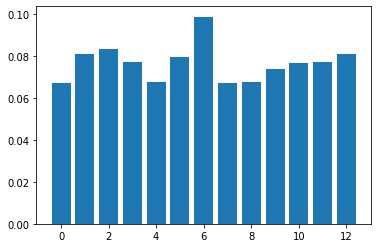

In [31]:

print(bst.feature_importances_)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

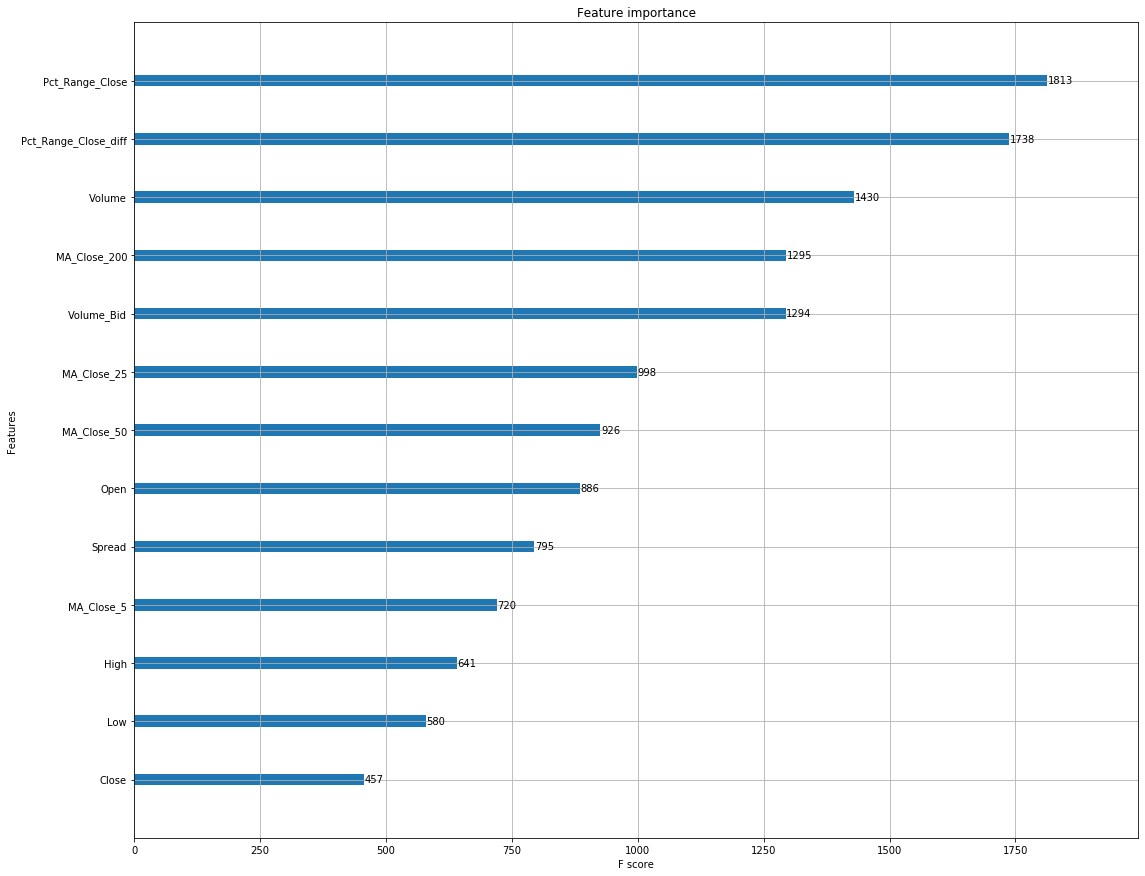

In [32]:


# plot feature importance

ax = plot_importance(bst)
fig = ax.figure
fig.set_size_inches(18, 15)
pyplot.show()

In [33]:
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None
 
# split data into X and y
x,y = data,labels
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 25.83%
Thresh=0.066, n=13, Accuracy: 25.83%
Thresh=0.067, n=12, Accuracy: 24.88%
Thresh=0.069, n=11, Accuracy: 25.24%
Thresh=0.071, n=10, Accuracy: 26.00%
Thresh=0.073, n=9, Accuracy: 25.77%
Thresh=0.075, n=8, Accuracy: 25.06%
Thresh=0.076, n=7, Accuracy: 25.77%
Thresh=0.079, n=6, Accuracy: 24.47%
Thresh=0.080, n=5, Accuracy: 23.41%
Thresh=0.080, n=4, Accuracy: 25.06%
Thresh=0.080, n=3, Accuracy: 25.59%
Thresh=0.081, n=2, Accuracy: 23.17%
Thresh=0.103, n=1, Accuracy: 24.41%


In [34]:
yhat = bst.predict(x)

In [35]:
y_real = pd.DataFrame({'Real_Class': y})
yhat_pd = pd.DataFrame({'Predicted_Class': yhat})
print(y_real)
print(yhat_pd)

      Real_Class
0            1.0
1            2.0
2            2.0
3            1.0
4           -2.0
...          ...
5132         1.0
5133         2.0
5134         1.0
5135         1.0
5136         0.0

[5137 rows x 1 columns]
      Predicted_Class
0                 1.0
1                 2.0
2                 2.0
3                 1.0
4                -2.0
...               ...
5132              1.0
5133             -1.0
5134              2.0
5135              1.0
5136              0.0

[5137 rows x 1 columns]


In [36]:
x_real = pd.concat([x,y_real], axis=1, sort=False)
print(x_real.shape)
print(x_real.head)

(5137, 14)
<bound method NDFrame.head of          Open     High      Low    Close        Volume    Volume_Bid   Spread  \
0     1.25950  1.26052  1.24698  1.25733  4.621817e+05  5.597896e+05  0.00010   
1     1.25717  1.26282  1.25214  1.25832  1.066578e+06  1.277971e+06  0.00026   
2     1.25925  1.26487  1.25789  1.26318  6.879980e+04  8.372040e+04  0.00010   
3     1.26324  1.26935  1.26301  1.26830  1.119689e+06  1.353480e+06  0.00010   
4     1.26836  1.28093  1.26666  1.27150  1.125442e+06  1.354807e+06  0.00010   
...       ...      ...      ...      ...           ...           ...      ...   
5132  1.09019  1.09960  1.08970  1.09787  2.219154e+05  2.075363e+05  0.00003   
5133  1.09788  1.10311  1.09342  1.10169  3.392159e+05  3.194905e+05  0.00003   
5134  1.10168  1.10937  1.09919  1.10782  2.907155e+05  2.312052e+05  0.00003   
5135  1.10780  1.11452  1.10702  1.11071  3.306924e+05  3.730174e+05  0.00035   
5136  1.11213  1.11217  1.11028  1.11158  1.012642e+04  9.217483e+03

In [37]:
x_full1 = pd.concat([x_real,yhat_pd], axis=1, sort=False)
print(x_full1.shape)
print(x_full1.head)

(5137, 15)
<bound method NDFrame.head of          Open     High      Low    Close        Volume    Volume_Bid   Spread  \
0     1.25950  1.26052  1.24698  1.25733  4.621817e+05  5.597896e+05  0.00010   
1     1.25717  1.26282  1.25214  1.25832  1.066578e+06  1.277971e+06  0.00026   
2     1.25925  1.26487  1.25789  1.26318  6.879980e+04  8.372040e+04  0.00010   
3     1.26324  1.26935  1.26301  1.26830  1.119689e+06  1.353480e+06  0.00010   
4     1.26836  1.28093  1.26666  1.27150  1.125442e+06  1.354807e+06  0.00010   
...       ...      ...      ...      ...           ...           ...      ...   
5132  1.09019  1.09960  1.08970  1.09787  2.219154e+05  2.075363e+05  0.00003   
5133  1.09788  1.10311  1.09342  1.10169  3.392159e+05  3.194905e+05  0.00003   
5134  1.10168  1.10937  1.09919  1.10782  2.907155e+05  2.312052e+05  0.00003   
5135  1.10780  1.11452  1.10702  1.11071  3.306924e+05  3.730174e+05  0.00035   
5136  1.11213  1.11217  1.11028  1.11158  1.012642e+04  9.217483e+03

In [38]:
#Save
x_full1.to_csv(full_dataset_results_csv, header=True, index=False)